## This notebook contains the tutorials for Normalizing Flows using Pyro.

**Pyro is a universal probabilistic programming language written in Python and supported by PyTorch on the backend. Pyro enables flexible and expressive deep probabilistic modeling.**

**Normalizing Flows:-** Normalizing Flows are a method for constructing complex distributions by transforming a probability density through a series of invertible mappings. By repeatedly applying the rule for change of variables, the initial density 'flows' through the sequence of invertible mappings.

In [2]:
!pip install pyro-ppl

     |████████████████████████████████| 634kB 7.9MB/s 


In [3]:
import torch
import pyro
import pyro.distributions as dist
import pyro.distributions.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
import os
smoke_test = ('CI' in os.environ)

In [4]:
dist_x = dist.Normal(torch.zeros(1), torch.ones(1))
exp_transform = T.ExpTransform()
dist_y = dist.TransformedDistribution(dist_x, [exp_transform])

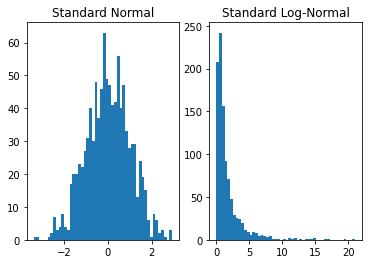

In [5]:
plt.subplot(1, 2, 1)
plt.hist(dist_x.sample([1000]).numpy(), bins=50)
plt.title('Standard Normal')
plt.subplot(1, 2, 2)
plt.hist(dist_y.sample([1000]).numpy(), bins=50)
plt.title('Standard Log-Normal')
plt.show()

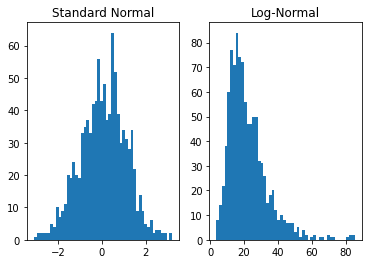

In [6]:
dist_x = dist.Normal(torch.zeros(1), torch.ones(1))
affine_transform = T.AffineTransform(loc=3, scale=0.5)
exp_transform = T.ExpTransform()
dist_y = dist.TransformedDistribution(dist_x, [affine_transform, exp_transform])

plt.subplot(1, 2, 1)
plt.hist(dist_x.sample([1000]).numpy(), bins=50)
plt.title('Standard Normal')
plt.subplot(1, 2, 2)
plt.hist(dist_y.sample([1000]).numpy(), bins=50)
plt.title('Log-Normal')
plt.show()

# Learnable Univariate Distributions in Pyro